<a href="https://colab.research.google.com/github/Animesh-Guchhait/Semi-Supervised-Learning/blob/master/ml_assign3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Packages:

import numpy as np
import pandas as pd
import os
import time
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore' )
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import tensorflow as tf
from tensorflow import keras

Import fashion mnist data

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train1, y_train), (X_test1, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train1.shape

(60000, 28, 28)

In [ ]:
X_train1.dtype

dtype('uint8')

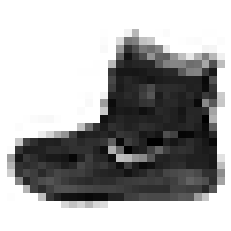

In [ ]:
plt.imshow(X_train1[0], cmap="binary")
plt.axis('off')
plt.show()

Reshape the data for logistic regression




In [ ]:
nsamples, nx, ny = X_train1.shape
X_train = X_train1.reshape((nsamples,nx*ny))
nsamples, nx, ny = X_test1.shape
X_test=X_test1.reshape((nsamples,nx*ny))


Standard scaling the data

In [ ]:
from sklearn.preprocessing import StandardScaler
train_dataset=StandardScaler().fit_transform(X_train)
test_dataset=StandardScaler().fit_transform(X_test)


In [ ]:
train_dataset

array([[-0.00864371, -0.02322333, -0.03917806, ..., -0.15681128,
        -0.08967308, -0.03414729],
       [-0.00864371, -0.02322333, -0.03917806, ..., -0.15681128,
        -0.08967308, -0.03414729],
       [-0.00864371, -0.02322333, -0.03917806, ..., -0.15681128,
        -0.08967308, -0.03414729],
       ...,
       [-0.00864371, -0.02322333, -0.03917806, ..., -0.15681128,
        -0.08967308, -0.03414729],
       [-0.00864371, -0.02322333, -0.03917806, ..., -0.15681128,
        -0.08967308, -0.03414729],
       [-0.00864371, -0.02322333, -0.03917806, ..., -0.15681128,
        -0.08967308, -0.03414729]])

In [ ]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Class name to Target Variable:

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
class_names[y_train[0]]

'Ankle boot'

Logistic regression on whole trainning data

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(multi_class="auto", solver="lbfgs", random_state=42)

In [ ]:
log_reg.fit(train_dataset,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
log_reg.score(test_dataset, y_test)

0.8434

So, by logistic regression on whole trainning data we get 84.34% accuracy on test data.

In [ ]:
# log_reg on hyperparameter solver="liblinear" & max_iter=200 :
log_reg1 = LogisticRegression(multi_class="auto",max_iter=200, solver="liblinear", random_state=42)

In [ ]:
# Logestic Regression on random datapoints[range of i]:
l=[]
for i in range(10,36):
  X_trainn, X_te, y_trainn, y_te = train_test_split( train_dataset, y_train, train_size=i, random_state=42)
  log_reg1.fit(X_trainn,y_trainn)
  l.append(log_reg1.score(test_dataset,y_test))
print(l) ## accuaracy of each i belongs to range (10,35)
  

[0.4646, 0.463, 0.4811, 0.4624, 0.5023, 0.4855, 0.51, 0.51, 0.507, 0.5051, 0.5017, 0.4868, 0.4944, 0.4852, 0.4944, 0.5, 0.5034, 0.5337, 0.5577, 0.5661, 0.5655, 0.5662, 0.5681, 0.5653, 0.5649, 0.5622]


In [ ]:
# Logestic Regression on first 'ith' datapoints:
lt=[]
for i in range(10,36):
  log_reg1.fit(train_dataset[:i],y_train[:i])
  lt.append(log_reg1.score(test_dataset,y_test))
print(lt) ## accuaracy of each i belongs to range (10,35)



[0.3605, 0.3681, 0.385, 0.3972, 0.386, 0.3974, 0.3977, 0.4331, 0.4365, 0.4417, 0.4477, 0.4801, 0.5103, 0.5346, 0.574, 0.5814, 0.5918, 0.5888, 0.5891, 0.5883, 0.5966, 0.6037, 0.6169, 0.6135, 0.6284, 0.6263]


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=10, random_state=42)
X_digits_dist = kmeans.fit_transform(train_dataset)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)

In [ ]:
representative_digit_idx

array([ 5548, 30111, 33913, 52006, 19280, 37935,  9065, 53863,  7605,
       52337])

In [ ]:
X_digits_dist

array([[30.69013753, 37.23511433, 36.79427169, ..., 38.2568279 ,
        33.65077843, 39.1073764 ],
       [37.2292297 , 44.00139757, 31.03983821, ..., 36.0169417 ,
        42.46567002, 27.16797317],
       [31.50531361, 21.37227541, 33.36425486, ..., 12.11239044,
        40.95298073, 23.29002459],
       ...,
       [36.53348743, 38.66109531, 31.60815721, ..., 32.14915195,
        43.48256272, 19.74223832],
       [30.20760166, 20.74293118, 32.74704829, ..., 10.87047106,
        37.67259727, 27.13636431],
       [34.76014947, 16.70415204, 41.22499399, ..., 20.09402924,
        41.61530897, 36.92349574]])

In [ ]:
X_cluster_dist = X_digits_dist[np.arange(len(train_dataset)),kmeans.labels_]

In [ ]:
[np.arange(len(train_dataset)),kmeans.labels_]
#len(kmeans.labels_)

[array([    0,     1,     2, ..., 59997, 59998, 59999]),
 array([6, 5, 7, ..., 9, 7, 1], dtype=int32)]

In [ ]:
X_cluster_dist[1]

17.49157843263395

In [ ]:
X = np.array([[1, 2], [1, 4], [1, 0],
             [10, 2], [10, 4], [10, 0]])
kmeans1 = KMeans(n_clusters=2, random_state=0).fit_transform(X) 

In [ ]:
in_cluster = (kmeans.labels_ == 3)
cluster_dist = X_cluster_dist[in_cluster]
cutoff_distance = np.percentile(cluster_dist, 20)
above_cutoff = (X_cluster_dist > cutoff_distance)
X_cluster_dist[in_cluster & above_cutoff] = -1

In [ ]:
partially_propagated = (X_cluster_dist != -1)
partially_propagated

array([ True,  True,  True, ...,  True,  True,  True])

In [ ]:
cluster_dist = X_cluster_dist[in_cluster]
len(cluster_dist)

7515

In [ ]:
len(kmeans.labels_ == 2)

60000

In [ ]:
# 20 percentile closest to the core point:
percentile_closest = 20

In [ ]:
# Here two process code has considered:
# 1)choosing the centroid of kmeans as a training datapoints to fit logestic regression:
# 2)choosing 20 percentile closest datapoints to the centroids as training data and then fitting logestic regression:
start=time.time()
l_mean=[] # appened the accuracy of ith iteration in process 1
l_mean_close=[]# appened the accuracy of ith iteration in process 2


for i in range (10,36):
  print('value of k' ,i)
  kmeans = KMeans(n_clusters=i, random_state=42)
  X_digits_dist = kmeans.fit_transform(train_dataset)
  representative_digit_idx = np.argmin(X_digits_dist, axis=0)
  X_representative_digits = train_dataset[representative_digit_idx]
  y_representative_digits=y_train[representative_digit_idx]
  log_reg1.fit(X_representative_digits,y_representative_digits)
  l_mean.append(log_reg1.score(test_dataset,y_test))
  X_cluster_dist = X_digits_dist[np.arange(len(train_dataset)), kmeans.labels_]
  for j in range(i):
    in_cluster = (kmeans.labels_ == j)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1
  partially_propagated = (X_cluster_dist != -1)
  X_train_partially_propagated = train_dataset[partially_propagated]
  y_train_propagated = np.empty(len(X_train), dtype=np.int32)
  for j in range(i):
    y_train_propagated[kmeans.labels_==j] = y_representative_digits[j]
  y_train_partially_propagated = y_train_propagated[partially_propagated]
  log_reg1.fit(X_train_partially_propagated,y_train_partially_propagated)
  l_mean_close.append(log_reg1.score(test_dataset,y_test))
end=time.time()
print(end-start)

value of k 10
value of k 11
value of k 12
value of k 13
value of k 14
value of k 15
value of k 16
value of k 17
value of k 18
value of k 19
value of k 20
value of k 21
value of k 22
value of k 23
value of k 24
value of k 25
value of k 26
value of k 27
value of k 28
value of k 29
value of k 30
value of k 31
value of k 32
value of k 33
value of k 34
value of k 35
4752.682550430298


In [ ]:
print(lt) # first i points
print(l)  # random i points
print(l_mean) # after k_mean,taking only centroid
print(l_mean_close) # after k_mean 20%


[0.3605, 0.3681, 0.385, 0.3972, 0.386, 0.3974, 0.3977, 0.4331, 0.4365, 0.4417, 0.4477, 0.4801, 0.5103, 0.5346, 0.574, 0.5814, 0.5918, 0.5888, 0.5891, 0.5883, 0.5966, 0.6037, 0.6169, 0.6135, 0.6284, 0.6263]
[0.4646, 0.463, 0.4811, 0.4624, 0.5023, 0.4855, 0.51, 0.51, 0.507, 0.5051, 0.5017, 0.4868, 0.4944, 0.4852, 0.4944, 0.5, 0.5034, 0.5337, 0.5577, 0.5661, 0.5655, 0.5662, 0.5681, 0.5653, 0.5649, 0.5622]
[0.5393, 0.5254, 0.5363, 0.5235, 0.5824, 0.5942, 0.6205, 0.6422, 0.6556, 0.6054, 0.6488, 0.6552, 0.6522, 0.6415, 0.6413, 0.6401, 0.6394, 0.6272, 0.6377, 0.6419, 0.6358, 0.613, 0.6304, 0.6472, 0.6302, 0.6555]
[0.5477, 0.5284, 0.5221, 0.5119, 0.5793, 0.5817, 0.5974, 0.6232, 0.638, 0.5938, 0.6245, 0.6415, 0.6463, 0.6219, 0.6201, 0.6321, 0.6335, 0.6289, 0.6277, 0.6192, 0.6113, 0.5909, 0.6138, 0.6089, 0.5876, 0.588]


In [ ]:
# Checking error rate change [between randomly selecting datapoints and selecting centroid after k-means ]:
print(l_mean)
t=l_mean[:]
t.sort()
l_rate=dict()
l_rate_list=[]
print('\n')
print('Top five accuracy from process1 ( k_mean with only centroid)')
for i in range(len(l_mean)):
  if l_mean[i] in t[len(t)-5:]:
    print('k =',i+10, 'and accuracy is',l_mean[i])
  l_rate_list.append(1-(1-l_mean[i])/(1-l[i]))
  if 1-(1-l_mean[i])/(1-l[i]) in l_rate.keys():
    l_rate[1-(1-l_mean[i])/(1-l[i])].append(i+10)
  else:
    l_rate[1-(1-l_mean[i])/(1-l[i])]=[i+10]
print("\n")
print('reduced error by percentage for each k ')
p=sorted(l_rate)
print(l_rate)
print('\n')
print('Top 5 reducing in error rate')
for i in range(5):
  print(i+1,'number best reducing in error rate is',p[len(p)-i-1], 'and it for k =',l_rate[p[len(p)-i-1]])
   

[0.5393, 0.5254, 0.5363, 0.5235, 0.5824, 0.5942, 0.6205, 0.6422, 0.6556, 0.6054, 0.6488, 0.6552, 0.6522, 0.6415, 0.6413, 0.6401, 0.6394, 0.6272, 0.6377, 0.6419, 0.6358, 0.613, 0.6304, 0.6472, 0.6302, 0.6555]


Top five accuracy from process1 ( k_mean with only centroid)
k = 18 and accuracy is 0.6556
k = 20 and accuracy is 0.6488
k = 21 and accuracy is 0.6552
k = 22 and accuracy is 0.6522
k = 35 and accuracy is 0.6555


reduced error by percentage for each k 
{0.13952185282032126: [10], 0.11620111731843563: [11], 0.10637887839660809: [12], 0.11365327380952384: [13], 0.16094032549728765: [14], 0.2112730806608356: [15], 0.2255102040816327: [16], 0.26979591836734695: [17], 0.3014198782961459: [18], 0.20266720549605988: [19], 0.2952036925546859: [20], 0.3281371784879189: [21], 0.3121044303797469: [22], 0.30361305361305346: [23], 0.29054588607594944: [24], 0.2802: [25], 0.27386226339105924: [26], 0.20051469011366074: [27], 0.18087271082975376: [28], 0.17469463009910113: [29], 0.1617951668584

In [ ]:
# Repeat process 1 and 2 for k=50:

start=time.time()
l1=[]
l_mean1=[]
l_mean_close1=[]
print('value of k=50')
X_trainn, X_te, y_trainn, y_te = train_test_split( train_dataset, y_train, train_size=50, random_state=42)
log_reg1.fit(X_trainn,y_trainn)
l1.append(log_reg1.score(test_dataset,y_test))
kmeans = KMeans(n_clusters=50, random_state=42)
X_digits_dist = kmeans.fit_transform(train_dataset)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = train_dataset[representative_digit_idx]
y_representative_digits=y_train[representative_digit_idx]
log_reg.fit(X_representative_digits,y_representative_digits)
l_mean1.append(log_reg.score(test_dataset,y_test))
X_cluster_dist = X_digits_dist[np.arange(len(train_dataset)), kmeans.labels_]
for j in range(50):
  in_cluster = (kmeans.labels_ == j)
  cluster_dist = X_cluster_dist[in_cluster]
  cutoff_distance = np.percentile(cluster_dist, percentile_closest)
  above_cutoff = (X_cluster_dist > cutoff_distance)
  X_cluster_dist[in_cluster & above_cutoff] = -1
partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated =train_dataset[partially_propagated]
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for j in range(50):
  y_train_propagated[kmeans.labels_==j] = y_representative_digits[j]
y_train_partially_propagated = y_train_propagated[partially_propagated]
log_reg.fit(X_train_partially_propagated,y_train_partially_propagated)
l_mean_close1.append(log_reg.score(test_dataset,y_test))
end=time.time()
print(end-start)


value of k=50
298.1033048629761


In [ ]:
print(l1)
print(l_mean1)
print(l_mean_close1)

[0.5802]
[0.6695]
[0.6602]


**Report:**

Procedure of this assignment:

1) We read fashion_mnist dataset from keras.


2) Coding has done on four ways:
  

*   Fitting Logistic Regression on entire Dataset
*   Fitting Logistic Regression on randomly selected datapoints.
*   Fitting Logistic Regression on selected datapoints(selected      datapoints are centroid of k-means).
Fitting Logistic Regression on 20 percentile of closest data selected with respect to centroid.


**Observation:**

1)Fitting Logistic Regression on entire Dataset accuracy is nearly 84%

2)Fitting Logistic Regression on randomly selected datapoints accuracy is getting reduced gradually.

3)Fitting Logistic Regression on selected datapoints(selected      datapoints are centroid of k-means) accuracy is still low but much better than randomly selected datapoints.

4)Fitting Logistic Regression on 20 percentile of closest data selected with respect to centroid . Here accuracy is closest to above process(3) though most of the cases process 3 is better than 4. But result shows process 4 is better than process 2.

Here we iterate the k-value from 10 to 35 and we observe that for k=18,20,21,22 (k_mean with only centroid) we get better accuracy and  reduce error rate (compared to randomly selected datapoints). So, if we have to do semi-supervised learning with k-mean, then value of k between 20 to 22 is prefereble.














